In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
sns.set_style('whitegrid')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import os
os.chdir('..')

In [13]:
data = pd.read_csv("/Users/ashtynhaynes/Desktop/Stat426Python/BARproject/data.csv")
data = data[['author', 'selftext', 'title', 'body_image']]

In [14]:
tf = TfidfVectorizer()
X = tf.fit_transform(data['selftext'])

Text(0, 0.5, 'WCSS')

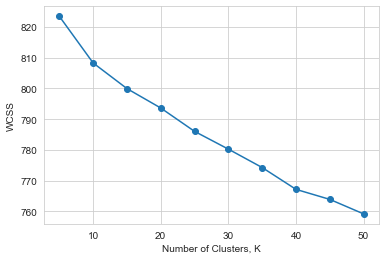

In [15]:
# this takes a long time to run
wcss_news = []
for k in range(5,51,5):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss_news.append(kmeans.inertia_)
plt.plot(np.arange(5,51,5),wcss_news,marker="o")
plt.xlabel('Number of Clusters, K')
plt.ylabel('WCSS')

In [16]:
k = 35
kmeans = MiniBatchKMeans(k)
kmeans.fit(X)
labs = kmeans.predict(X)

In [17]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

In [19]:
terms = tf.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()


Cluster 0: you are yours fighting your women triggers hadn dispare dedicating
Cluster 1: and my to the sleep was so me at but
Cluster 2: deleted zulressotm exposure exs expressway expressing expresses expressed express exposed
Cluster 3: he and to him the my it me so just
Cluster 4: breast very wellbutrin lexapro while is feeding to am imp
Cluster 5: deleted to was and the her my she he we
Cluster 6: binge incredibly good feel extremes know ed tea flare do
Cluster 7: and her lose talking this know wish but glass dysfunctional
Cluster 8: she and her to the my was it of me
Cluster 9: and to my the it of you is for have
Cluster 10: and lot you my doing advice wife so to divorced
Cluster 11: removed zulressotm exposure exs expressway expressing expresses expressed express exposed
Cluster 12: and to dissapear my he you uneasy formula that do
Cluster 13: lows highs passed share week good the of it to
Cluster 14: and her the my to me dad was it sleep
Cluster 15: maybe his smoke waste to smoki

In [20]:
Xdf = pd.DataFrame(X.toarray(), columns=tf.get_feature_names())

In [21]:
Xdf.head(2)

,000,0000,00pm,04,0730,08,10,100,1000,100lbs,...,zero,zip,zippered,zippering,zoloft,zombie,zone,zoom,zulresso,zulressotm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
Xdf.shape

(1045, 9083)

In [23]:
#dimensionality reduction using Trucated SVD (singular value decomposition)
# can be used for sparse matrices

from sklearn.decomposition import TruncatedSVD

In [24]:
svd = TruncatedSVD(n_components=2)
comps = svd.fit_transform(X)

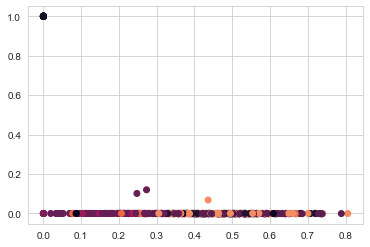

In [25]:
plt.scatter(comps[:,0], comps[:,1], c=kmeans.labels_)

In [26]:
import gensim
from gensim.utils import simple_preprocess

In [27]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data1 = data.selftext.values.tolist()
data_words = list(sent_to_words(data1))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashtynhaynes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['traumatic', 'delivery', 'knew', 'something', 'wrong', 'sure', 'feel', 'bonded', 'daughter', 'assured', 'normal', 'would', 'come', 'time', 'first', 'two', 'weeks', 'get', 'much', 'readdmited', 'er', 'infection', 'husband', 'want', 'admitted', 'could', 'got', 'home', 'started', 'bed']


In [28]:


import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 3), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 3), (24, 5), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [29]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
 
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
doc_lda

[(0,
  '0.013*"like" + 0.011*"feel" + 0.009*"get" + 0.009*"time" + 0.009*"know" + '
  '0.007*"baby" + 0.007*"husband" + 0.006*"would" + 0.006*"ppd" + '
  '0.006*"going"'),
 (1,
  '0.011*"get" + 0.010*"baby" + 0.008*"like" + 0.007*"feel" + 0.006*"want" + '
  '0.006*"hate" + 0.006*"time" + 0.005*"know" + 0.005*"ppd" + 0.005*"day"'),
 (2,
  '0.020*"feel" + 0.011*"baby" + 0.011*"like" + 0.009*"time" + 0.009*"get" + '
  '0.006*"really" + 0.006*"never" + 0.006*"know" + 0.006*"would" + '
  '0.005*"first"'),
 (3,
  '0.027*"feel" + 0.022*"like" + 0.013*"baby" + 0.009*"want" + 0.009*"time" + '
  '0.007*"know" + 0.007*"get" + 0.006*"would" + 0.006*"even" + 0.006*"day"'),
 (4,
  '0.014*"time" + 0.013*"feel" + 0.012*"want" + 0.010*"like" + 0.009*"get" + '
  '0.009*"baby" + 0.007*"help" + 0.006*"day" + 0.006*"know" + 0.006*"husband"'),
 (5,
  '0.009*"get" + 0.008*"baby" + 0.008*"feel" + 0.007*"time" + 0.006*"know" + '
  '0.006*"much" + 0.005*"like" + 0.005*"one" + 0.005*"would" + 0.005*"going"'),
 (

In [30]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/ashtynhaynes/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.023316  0.000857       1        1  31.220879
9      0.007706 -0.010690       2        1  15.586552
8      0.004278  0.001257       3        1  12.329514
7     -0.002924  0.003166       4        1   9.294679
4      0.005899  0.001930       5        1   8.830403
6      0.000841  0.009995       6        1   8.527016
2      0.004070  0.001070       7        1   6.558019
0      0.004643 -0.007375       8        1   4.392927
5     -0.026187 -0.015813       9        1   1.857351
1     -0.021642  0.015604      10        1   1.402660, topic_info=        Term         Freq        Total Category  logprob  loglift
48       get   923.000000   923.000000  Default  30.0000  30.0000
13      baby  1240.000000  1240.000000  Default  29.0000  29.0000
42      feel  1798.000000  1798.000000  Default  28.0000  28.0000
129     time   924.000000   924.000000  Default  27.0000  27.0000
73      like  1647.000000  1647.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
262     take     4.824790   345.671650  Topic10  -5.7809  -0.0049
331       go     5.311082   501.999833  Topic10  -5.6848  -0.2820
16    better     4.807453   393.743516  Topic10  -5.7845  -0.1387
61   husband     4.968673   533.778944  Topic10  -5.7515  -0.4100
152    would     4.899585   625.049722  Topic10  -5.7655  -0.5819

[788 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5718      2  0.722577        abc
3624      6  0.640029  absorbing
5321      3  0.583365   academic
4400      1  0.578839   accurate
1450      4  0.568315       acff
...     ...       ...        ...
6588      5  0.626449  yogaevent
5335      3  0.754565   zbrdlzvb
7794      5  0.429627        zip
7795      5  0.640847   zippered
7796      5  0.637936  zippering

[1674 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 10, 9, 8, 5, 7, 3, 1, 6, 2])